In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from utils.loaders import load_mnist
from models.AE import Autoencoder

### Defining the autoencoder

In [2]:
# run params
SECTION = 'vae'
RUN_ID = '0001'
DATA_NAME = 'digits'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

MODE =  'build' #'load' #

In [3]:
(x_train, y_train), (x_test, y_test) = load_mnist()

In [5]:
AE = Autoencoder(
    input_dim=(28, 28, 1),
    encoder_conv_filters=[32, 64, 64, 64],
    encoder_conv_kernel_size=[3, 3, 3, 3],
    encoder_conv_strides=[1, 2, 2, 1],
    decoder_conv_t_filters=[64, 64, 32, 1],
    decoder_conv_t_kernel_size=[3, 3, 3, 3],
    decoder_conv_t_strides=[1, 2, 2, 1],
    z_dim=2
)
if MODE == "build":
    AE.save(RUN_FOLDER)
else:
    AE.load_weights(os.path.join(RUN_FOLDER, "weights/weights.h5"))


Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [6]:
AE.encoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder_conv_0 (Conv2D)      (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
encoder_conv_1 (Conv2D)      (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
encoder_conv_2 (Conv2D)      (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 7, 7, 64)          0   

In [7]:
AE.decoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   [(None, 2)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3136)              9408      
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_0 (Conv2DTran (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_1 (Conv2DTran (None, 14, 14, 64)        36928     
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 14, 14, 64)        0   

In [8]:
LEARNING_RATE = 0.0005
BATCH_SIZE = 32
INITIAL_EPOCH = 0

In [9]:
AE.compile(LEARNING_RATE)

In [10]:
AE.train(     
    x_train[:1000],
    batch_size = BATCH_SIZE,
    epochs = 200,
    run_folder = RUN_FOLDER,
    initial_epoch = INITIAL_EPOCH
)

Train on 1000 samples
Epoch 1/200
 992/1000 [============================>.] - ETA: 0s - loss: 0.1669
Epoch 00001: saving model to run/vae/0001_digits/weights/weights.h5
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.1663
Epoch 2/200
 992/1000 [============================>.] - ETA: 0s - loss: 0.0772
Epoch 00002: saving model to run/vae/0001_digits/weights/weights.h5
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0771
Epoch 3/200
 992/1000 [============================>.] - ETA: 0s - loss: 0.0680
Epoch 00003: saving model to run/vae/0001_digits/weights/weights.h5
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0680
Epoch 4/200
 960/1000 [===========================>..] - ETA: 0s - loss: 0.0659
Epoch 00004: saving model to run/vae/0001_digits/weights/weights.h5
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0659
Epoch 5/200
 992/1000 [============================>.] - ETA: 0s - loss: 0.0610
Epoch 0000

Epoch 38/200
 992/1000 [============================>.] - ETA: 0s - loss: 0.0456
Epoch 00038: saving model to run/vae/0001_digits/weights/weights.h5
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.0457
Epoch 39/200
 992/1000 [============================>.] - ETA: 0s - loss: 0.0458
Epoch 00039: saving model to run/vae/0001_digits/weights/weights.h5
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.0458
Epoch 40/200
 960/1000 [===========================>..] - ETA: 0s - loss: 0.0456
Epoch 00040: saving model to run/vae/0001_digits/weights/weights.h5
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.0455
Epoch 41/200
 992/1000 [============================>.] - ETA: 0s - loss: 0.0452
Epoch 00041: saving model to run/vae/0001_digits/weights/weights.h5
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.0452
Epoch 42/200
 960/1000 [===========================>..] - ETA: 0s - loss: 0.0449
Epoch 00042: saving model t

Epoch 75/200
 960/1000 [===========================>..] - ETA: 0s - loss: 0.0405
Epoch 00075: saving model to run/vae/0001_digits/weights/weights.h5
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0405
Epoch 76/200
 992/1000 [============================>.] - ETA: 0s - loss: 0.0404
Epoch 00076: saving model to run/vae/0001_digits/weights/weights.h5
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0405
Epoch 77/200
 992/1000 [============================>.] - ETA: 0s - loss: 0.0404
Epoch 00077: saving model to run/vae/0001_digits/weights/weights.h5
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0404
Epoch 78/200
 992/1000 [============================>.] - ETA: 0s - loss: 0.0399
Epoch 00078: saving model to run/vae/0001_digits/weights/weights.h5
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0400
Epoch 79/200
 992/1000 [============================>.] - ETA: 0s - loss: 0.0403
Epoch 00079: saving model t

Epoch 112/200
 960/1000 [===========================>..] - ETA: 0s - loss: 0.0380
Epoch 00112: saving model to run/vae/0001_digits/weights/weights.h5
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0379
Epoch 113/200
 992/1000 [============================>.] - ETA: 0s - loss: 0.0377
Epoch 00113: saving model to run/vae/0001_digits/weights/weights.h5
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0378
Epoch 114/200
 992/1000 [============================>.] - ETA: 0s - loss: 0.0378
Epoch 00114: saving model to run/vae/0001_digits/weights/weights.h5
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0378
Epoch 115/200
 960/1000 [===========================>..] - ETA: 0s - loss: 0.0376
Epoch 00115: saving model to run/vae/0001_digits/weights/weights.h5
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0378
Epoch 116/200
 992/1000 [============================>.] - ETA: 0s - loss: 0.0382
Epoch 00116: saving mo

1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0363
Epoch 149/200
 992/1000 [============================>.] - ETA: 0s - loss: 0.0362
Epoch 00149: saving model to run/vae/0001_digits/weights/weights.h5
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0362
Epoch 150/200
 992/1000 [============================>.] - ETA: 0s - loss: 0.0363
Epoch 00150: saving model to run/vae/0001_digits/weights/weights.h5
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0364
Epoch 151/200
 992/1000 [============================>.] - ETA: 0s - loss: 0.0363
Epoch 00151: saving model to run/vae/0001_digits/weights/weights.h5
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0363
Epoch 152/200
 960/1000 [===========================>..] - ETA: 0s - loss: 0.0361
Epoch 00152: saving model to run/vae/0001_digits/weights/weights.h5
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0362
Epoch 153/200
 960/1000 [=====

 992/1000 [============================>.] - ETA: 0s - loss: 0.0352
Epoch 00185: saving model to run/vae/0001_digits/weights/weights.h5
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0352
Epoch 186/200
 992/1000 [============================>.] - ETA: 0s - loss: 0.0353
Epoch 00186: saving model to run/vae/0001_digits/weights/weights.h5
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0353
Epoch 187/200
 960/1000 [===========================>..] - ETA: 0s - loss: 0.0357
Epoch 00187: saving model to run/vae/0001_digits/weights/weights.h5
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0359
Epoch 188/200
 960/1000 [===========================>..] - ETA: 0s - loss: 0.0360
Epoch 00188: saving model to run/vae/0001_digits/weights/weights.h5
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0358
Epoch 189/200
 992/1000 [============================>.] - ETA: 0s - loss: 0.0352
Epoch 00189: saving model to run/vae

### Analysis of Autoencoder

In [14]:
from utils.loaders import load_mnist, load_model

# run params
SECTION = 'vae'
RUN_ID = '0001'
DATA_NAME = 'digits'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

In [15]:
(x_train, y_train), (x_test, y_test) = load_mnist()

In [16]:
AE = load_model(Autoencoder, RUN_FOLDER)

### Reconstructing Older Paintings


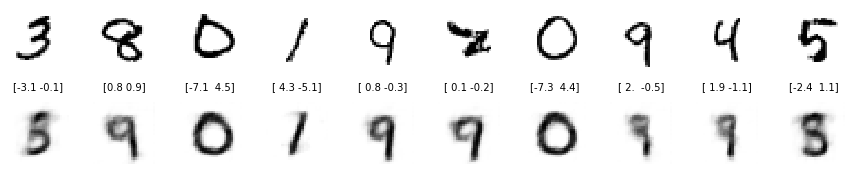

In [20]:

n_to_show = 10
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]

z_points = AE.encoder.predict(example_images)

reconst_images = AE.decoder.predict(z_points)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_points[i],1)), fontsize=10, ha='center', transform=ax.transAxes)   
    ax.imshow(img, cmap='gray_r')

for i in range(n_to_show):
    img = reconst_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    ax.axis('off')
    ax.imshow(img, cmap='gray_r')

### Encoders Wall

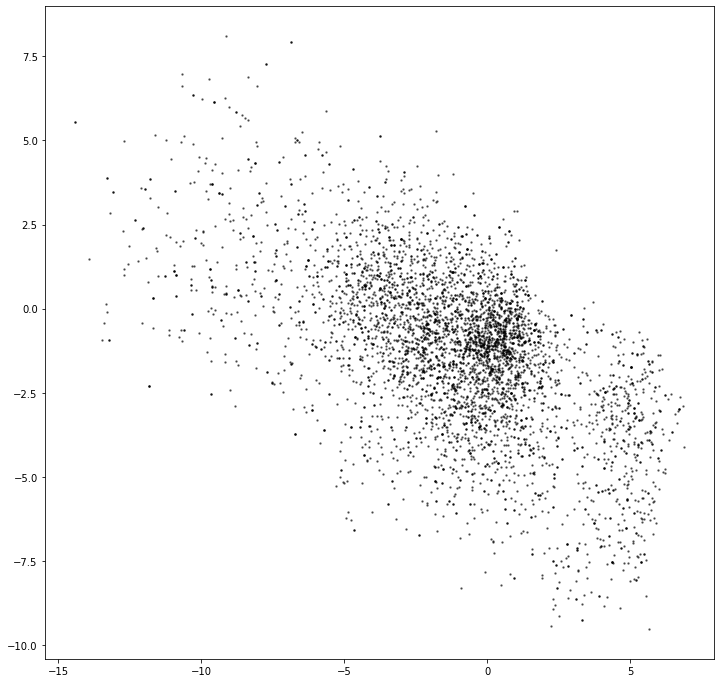

In [21]:
n_to_show = 5000
grid_size = 15
figsize = 12

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = AE.encoder.predict(example_images)

min_x = min(z_points[:, 0])
max_x = max(z_points[:, 0])
min_y = min(z_points[:, 1])
max_y = max(z_points[:, 1])

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)
plt.show()

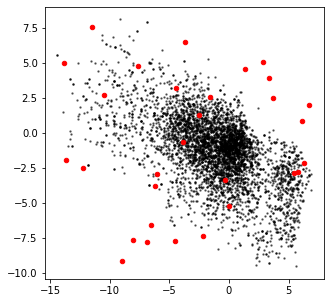

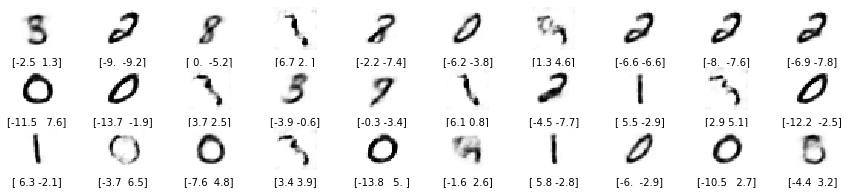

In [22]:
figsize = 5

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)

grid_size = 10
grid_depth = 3
figsize = 15

x = np.random.uniform(min_x,max_x, size = grid_size * grid_depth)
y = np.random.uniform(min_y,max_y, size = grid_size * grid_depth)
z_grid = np.array(list(zip(x, y)))
reconst = AE.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'red', alpha=1, s=20)
plt.show()

fig = plt.figure(figsize=(figsize, grid_depth))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(grid_size*grid_depth):
    ax = fig.add_subplot(grid_depth, grid_size, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_grid[i],1)), fontsize=10, ha='center', transform=ax.transAxes)
    
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')

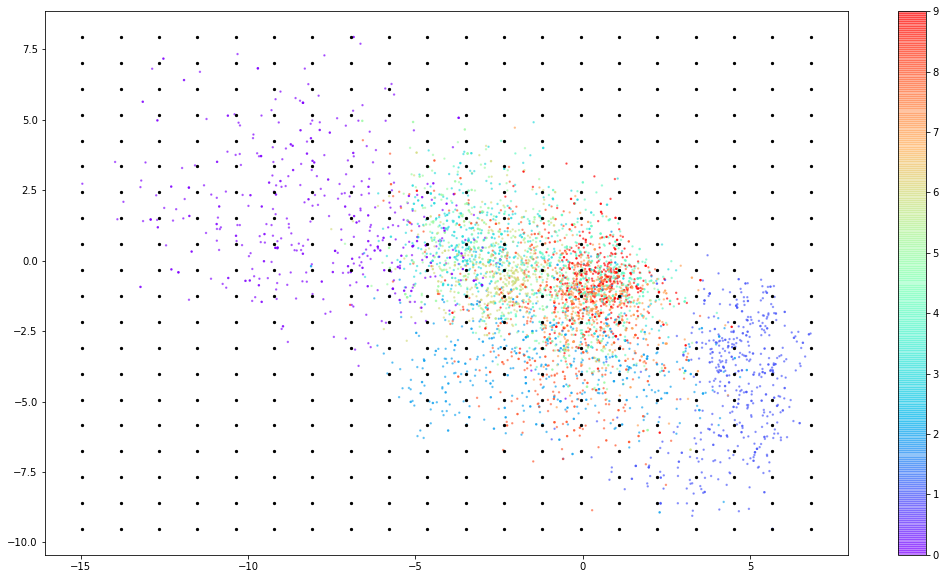

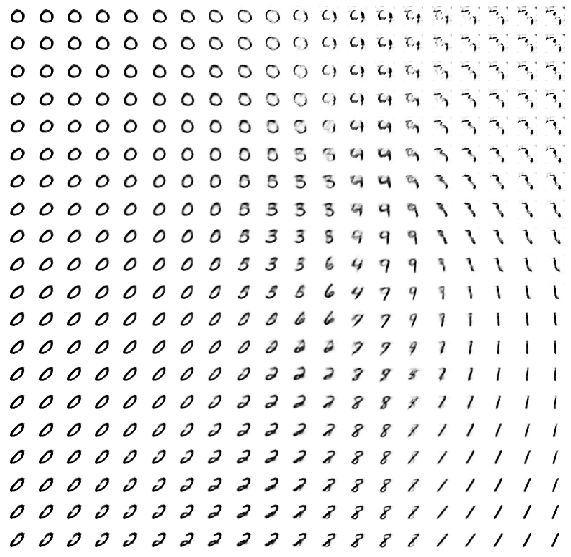

In [29]:
n_to_show = 5000
grid_size = 20
figsize = 10

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = AE.encoder.predict(example_images)

plt.figure(figsize=(18, 10))
plt.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c= example_labels
            , alpha=0.5, s=2)
plt.colorbar()

# x = norm.ppf(np.linspace(0.05, 0.95, 10))
# y = norm.ppf(np.linspace(0.05, 0.95, 10))
x = np.linspace(min(z_points[:, 0]), max(z_points[:, 0]), grid_size)
y = np.linspace(max(z_points[:, 1]), min(z_points[:, 1]), grid_size)
xv, yv = np.meshgrid(x, y)
xv = xv.flatten()
yv = yv.flatten()
z_grid = np.array(list(zip(xv, yv)))

reconst = AE.decoder.predict(z_grid)

plt.scatter(
    z_grid[:, 0], 
    z_grid[:, 1], 
    c = 'black', #cmap='rainbow' , c= example_labels
    alpha=1, 
    s=5
)
plt.show()


fig = plt.figure(figsize=(figsize, figsize))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(grid_size**2):
    ax = fig.add_subplot(grid_size, grid_size, i+1)
    ax.axis('off')
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')

### Variational Autoencoder

In [30]:
import os

from models.VAE import VariationalAutoencoder
from utils.loaders import load_mnist

In [31]:
# run params
SECTION = 'vae'
RUN_ID = '0002'
DATA_NAME = 'digits'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode = 'build' #'load' 

In [32]:
(x_train, y_train), (x_test, y_test) = load_mnist()

In [33]:
vae = VariationalAutoencoder(
    input_dim = (28,28,1),
    encoder_conv_filters = [32,64,64, 64],
    encoder_conv_kernel_size = [3,3,3,3],
    encoder_conv_strides = [1,2,2,1],
    decoder_conv_t_filters = [64,64,32,1],
    decoder_conv_t_kernel_size = [3,3,3,3],
    decoder_conv_t_strides = [1,2,2,1],
    z_dim = 2
)

vae.save(RUN_FOLDER)


Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [34]:
vae.encoder.summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
encoder_conv_0 (Conv2D)         (None, 28, 28, 32)   320         encoder_input[0][0]              
__________________________________________________________________________________________________
leaky_re_lu_21 (LeakyReLU)      (None, 28, 28, 32)   0           encoder_conv_0[0][0]             
__________________________________________________________________________________________________
encoder_conv_1 (Conv2D)         (None, 14, 14, 64)   18496       leaky_re_lu_21[0][0]             
___________________________________________________________________________________________

In [35]:
vae.decoder.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   [(None, 2)]               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3136)              9408      
_________________________________________________________________
reshape_3 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_0 (Conv2DTran (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_1 (Conv2DTran (None, 14, 14, 64)        36928     
_________________________________________________________________
leaky_re_lu_26 (LeakyReLU)   (None, 14, 14, 64)        0  

In [38]:
LEARNING_RATE = 0.0005
R_LOSS_FACTOR = 1000
BATCH_SIZE = 32
EPOCHS = 200
PRINT_EVERY_N_BATCHES = 100
INITIAL_EPOCH = 0

In [39]:
vae.compile(LEARNING_RATE, R_LOSS_FACTOR)